# Exercício 5 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9605361819267273, 8.580903271059948e-16)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FifthMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2          3
0 -0.216549  3.273472  6.285520   7.419985
1  1.166360  3.867211 -0.780863   5.864078
2 -0.053111  1.220557  1.761053   2.941826
3  0.793482  4.107869  2.492031   6.048237
4 -2.468365  4.905068  7.044965  11.911218


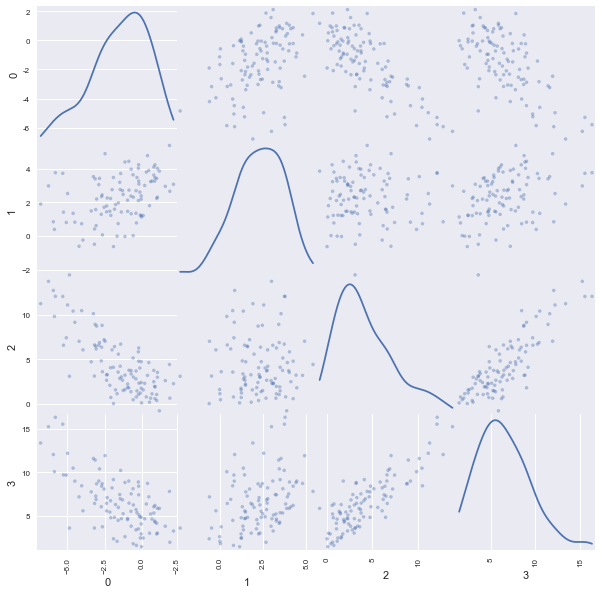

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.5198,0.9643,0.0081817
1,0.0327,0.0481,0.9859,0.36733
2,0,0.3265,0.922,1.8085e-05
3,0.0007,0.7192,0.9546,0.0016973


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 1)

Execution time: 0.019997835159301758 seconds


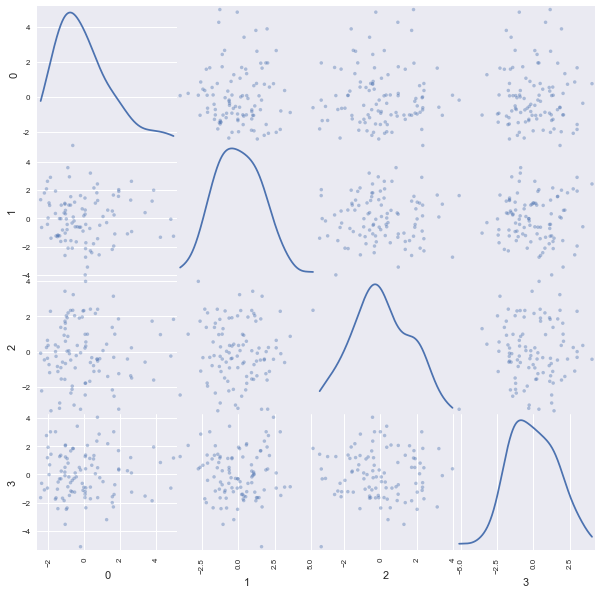

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.6495,0.9251,2.6483e-05
1,0.1641,0.2399,0.9937,0.92653
2,0,0.1821,0.9845,0.29337
3,0.1757,0.0994,0.9893,0.60628


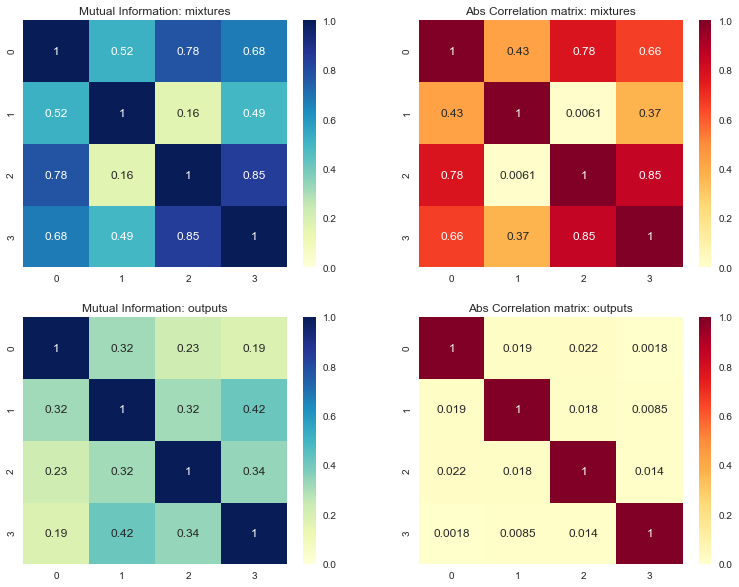

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1,runs  = 1) 

Execution time: 0.009998798370361328 seconds


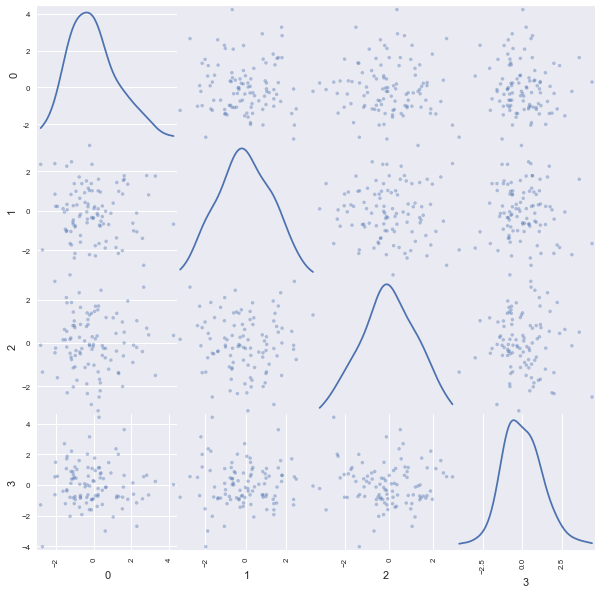

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.1059,0.9693,0.019586
1,0,0.2198,0.9924,0.852
2,0,0.045,0.9936,0.92297
3,0.2662,0.1104,0.9793,0.11666


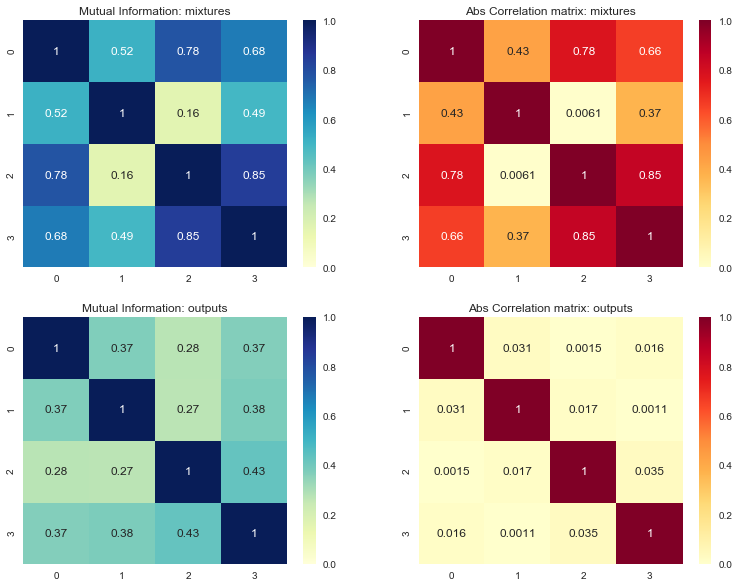

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-3, runs = 1)

Execution time: 0.009959936141967773 seconds


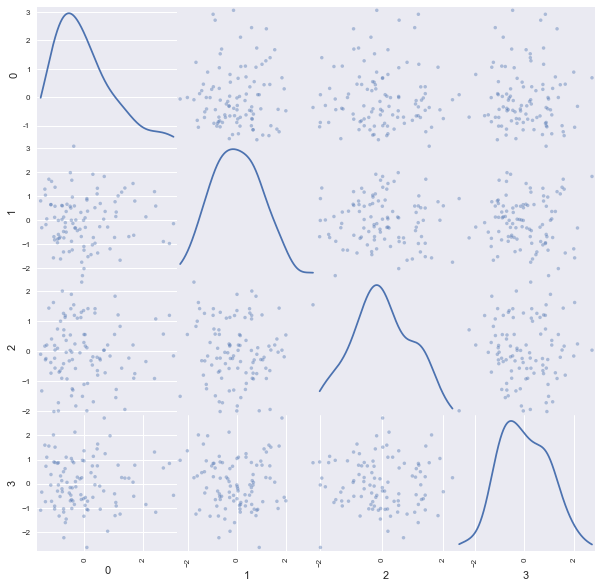

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.6718,0.9226,1.9294e-05
1,0.1397,0.0347,0.9923,0.84228
2,0,0.2169,0.9826,0.21214
3,0.0971,0.0582,0.9901,0.67114


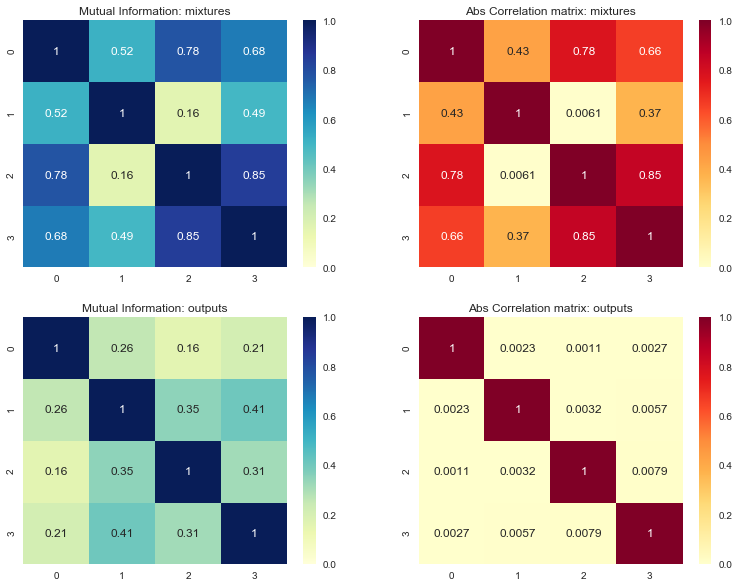

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

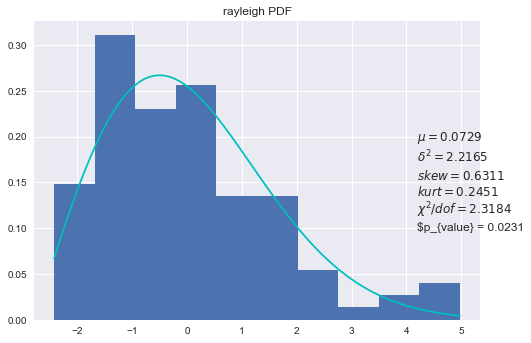

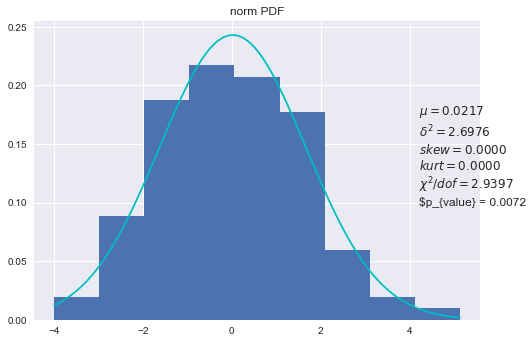

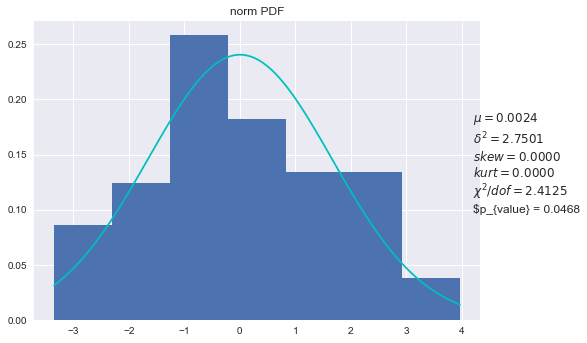

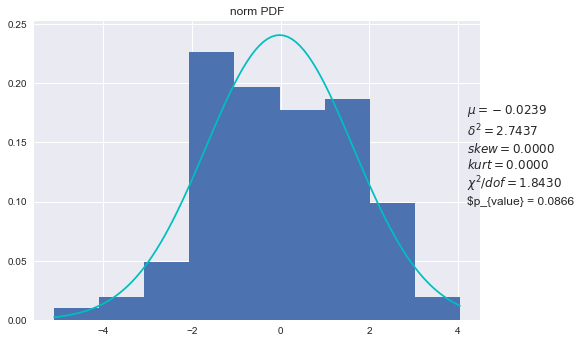

In [15]:
from evaluation import graph_fittedData
for i, y in enumerate(yNPCA):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedback network

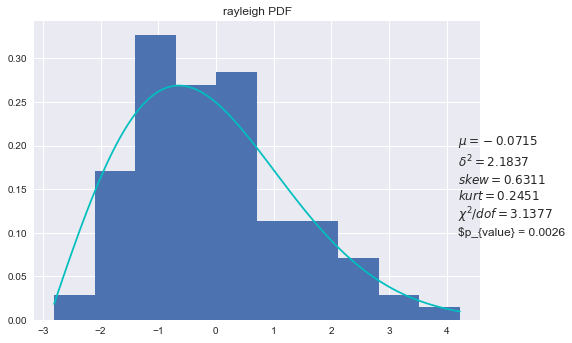

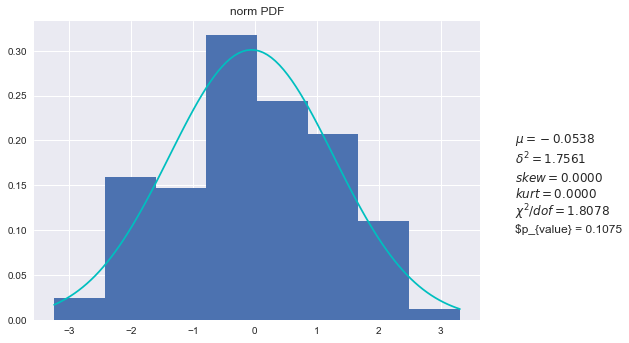

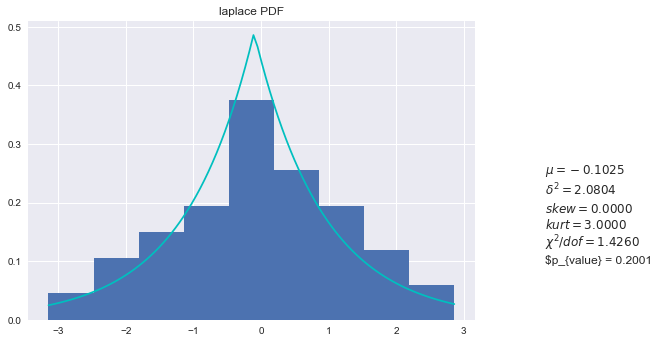

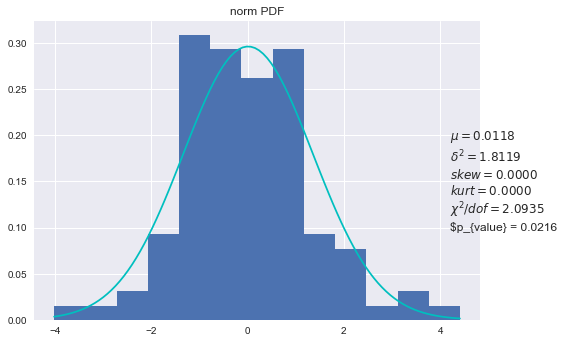

In [16]:
for i, y in enumerate(yFeedback):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedforward network

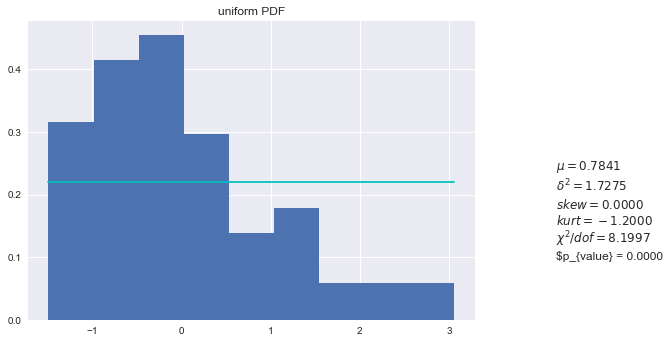

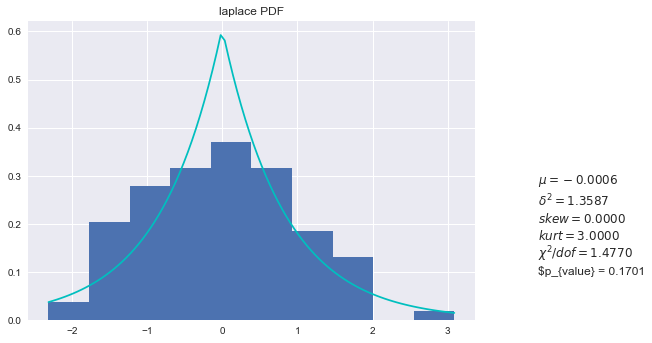

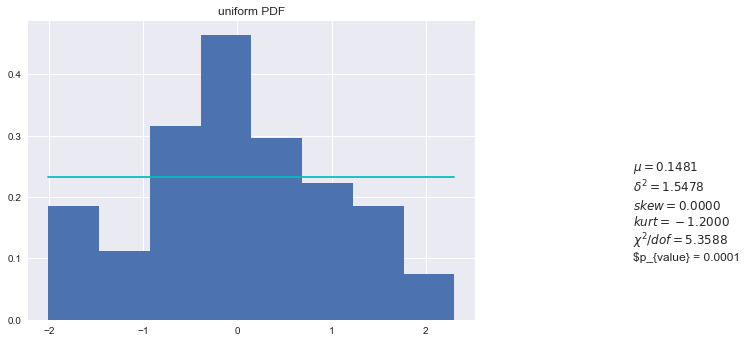

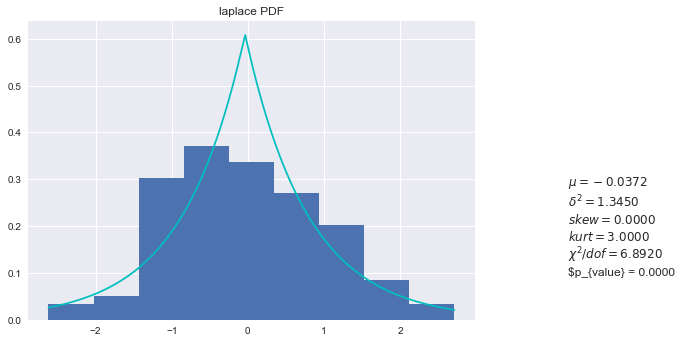

In [17]:
for i, y in enumerate(yFeedforward):
    graph_fittedData(y)

# Fontes conhecidas

In [18]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/FifthSource100Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(4, 100)


,0,1,2,3
0,-0.216549,3.273472,6.285520,7.419985
1,1.166360,3.867211,-0.780863,5.864078
2,-0.053111,1.220557,1.761053,2.941826
3,0.793482,4.107869,2.492031,6.048237
4,-2.468365,4.905068,7.044965,11.911218


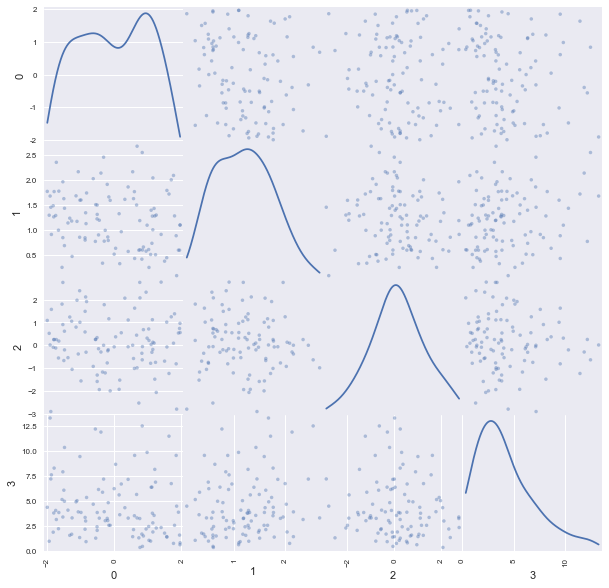

In [19]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(4, 100) (4, 100)
[[ 0.38002943  0.44900461  0.2271864   0.46923371]
 [ 0.16170773  0.09304501  0.04410655  0.44208654]
 [ 0.58281047  0.21301973  0.1327869   0.10498557]
 [ 0.03605993  0.57204173  0.36528381  1.2464283 ]]


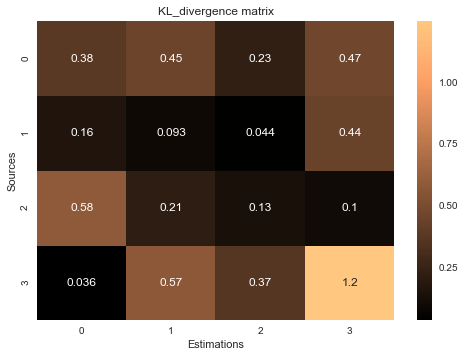

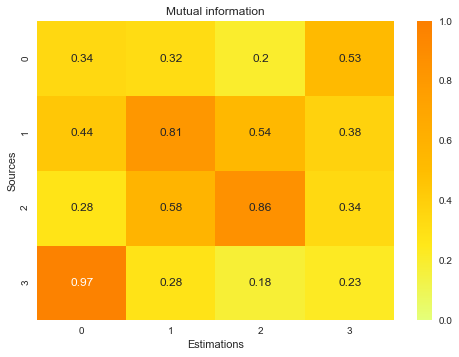

In [20]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(4, 100) (4, 100)
[[ 0.3451827   0.21419172  0.19600363  0.58852404]
 [ 0.05634763  0.06546802  0.10171474  0.2748415 ]
 [ 0.32965568  0.12471219  0.01090077  0.19604642]
 [ 0.29360144  0.65750063  0.60544542  0.87288781]]


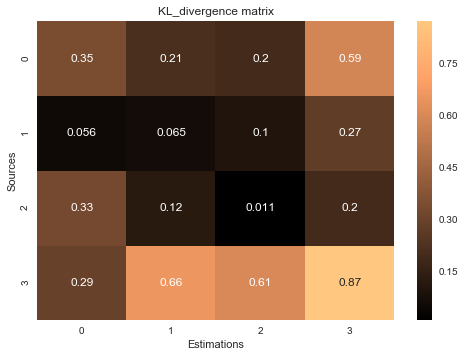

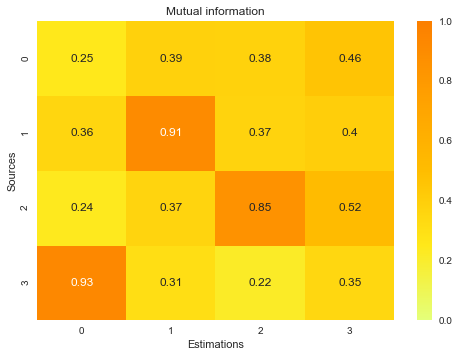

In [21]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(4, 100) (4, 100)
[[ 0.31174427  0.49924393  0.17558833  0.40749638]
 [ 0.18258221  0.05984571  0.09533589  0.12776061]
 [ 0.54863581  0.21715685  0.10301307  0.0897146 ]
 [ 0.02246844  0.40850735  0.40845195  0.69022664]]


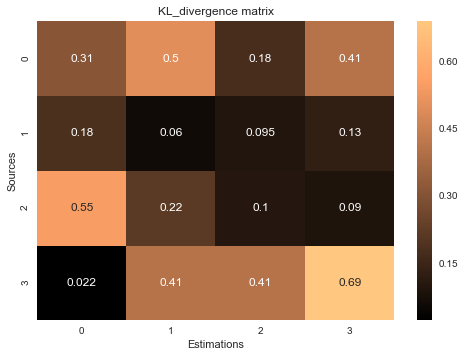

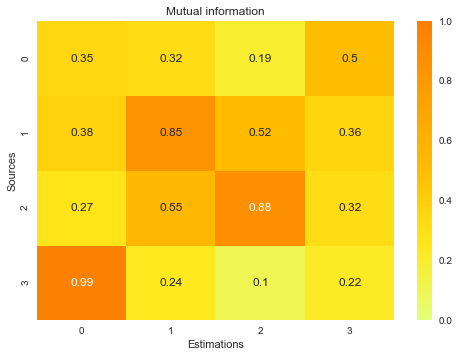

In [22]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)